In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

#Statistics
# Statistics
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.special import inv_boxcox
from scipy.stats import boxcox
from scipy.interpolate import interp1d

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from dateutil.parser import parse 
import pickle

# READ CSV AND DESCRIPTION OF SERIES


In [2]:
#STOCK TO FLOW
stock_to_flow = pd.read_csv("data/bitcoin-stock-to-flow-ratio-usd.csv")

stock_to_flow["Stock-to-Flow Ratio/t"] = stock_to_flow["Stock-to-Flow Ratio/t"].str.rstrip("T00:00:00.000Z")
stock_to_flow["Stock-to-Flow Ratio/t"] = pd.to_datetime(stock_to_flow["Stock-to-Flow Ratio/t"])
stock_to_flow = stock_to_flow.sort_values(by='Stock-to-Flow Ratio/t')
stock_to_flow = stock_to_flow.rename(columns={'Stock-to-Flow Ratio/t': 'Timestamp'})

stock_to_flow.head()

,Timestamp,Stock-to-Flow Ratio/o/daysTillHalving,Stock-to-Flow Ratio/o/ratio,Stock-to-Flow Ratio/o/price
8,2010-01-01,1053,0.008259,NaN
0,2010-01-02,1061,0.006671,NaN
18,2010-01-02,1043,0.011074,NaN
28,2010-01-03,1033,0.015077,NaN
1,2010-01-03,1060,0.006872,NaN


In [3]:
#Description
print("\nShape is:", stock_to_flow.shape)
print("\nSummary of the dataset:")
stock_to_flow.describe()
print("\nAre there null values?")
stock_to_flow.isna().sum()


Shape is: (6450, 4)

Summary of the dataset:

Are there null values?


Timestamp                                   0
Stock-to-Flow Ratio/o/daysTillHalving       0
Stock-to-Flow Ratio/o/ratio                 0
Stock-to-Flow Ratio/o/price              2021
dtype: int64

# VISUALIZATION

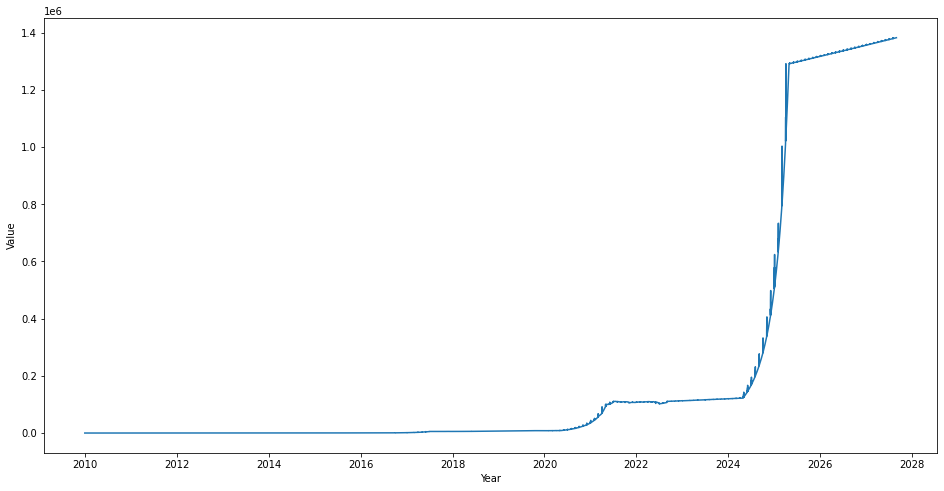

In [4]:
plt.figure(figsize=(16,8))
plt.plot(stock_to_flow["Timestamp"], stock_to_flow["Stock-to-Flow Ratio/o/ratio"])
plt.gca().set(xlabel="Year", ylabel="Value")
#scommentare riga giù per visualizzare in scala log
#plt.yscale('log') 
plt.show()

#E ANCHE QUI, CAPIRE QUEI "PICCHI" PERCHE' SPUNTANO (credo si vedano perchè il range y è troppo alto)

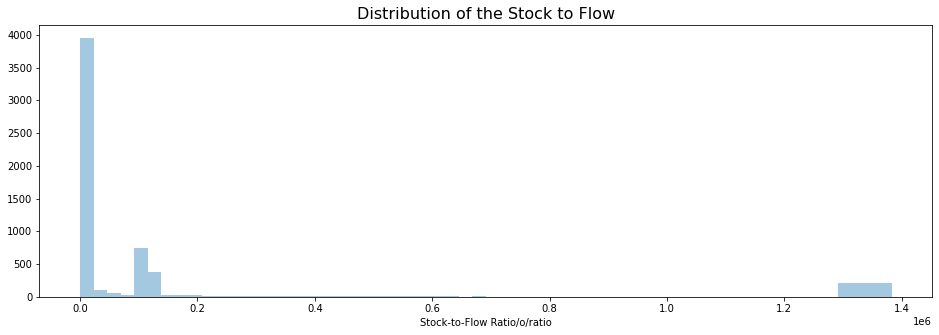

In [6]:
plt.figure(figsize=(16,5))
sns.distplot(stock_to_flow["Stock-to-Flow Ratio/o/ratio"], kde = False, bins = 60)
plt.title('Distribution of the Stock to Flow', fontsize=16)
plt.show()